In [1]:
# Anil Kumar Ravuru

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df = pd.read_json('../Project/fb_data.json')
df.columns

Index(['fb_id', 'link', 'fb_like', 'fb_angry', 'fb_thankful', 'fb_haha',
       'type', 'description', 'page_id', 'fb_sad', 'external_picture',
       'shares', 'id', 'database', 'message', 'time_created', 'fb_wow',
       'fanpagelink', 'name', 'num_comments', 'fb_love'],
      dtype='object')

In [2]:
desired_fields = ['description', 'message', 'fb_like', 'fb_angry', 'fb_thankful', 'fb_haha', 
                  'fb_sad', 'fb_wow', 'fb_love']
xdf = df[desired_fields]
xdf.head()

,description,message,fb_like,fb_angry,fb_thankful,fb_haha,fb_sad,fb_wow,fb_love
0,But how is this about the burger?,A proof that makeup and sorcery go hand in han...,1878,1,0,391,0,3,22
1,Click to see the pic and write a comment...,My imaginary relationship with Tom Hiddleston ...,7606,5,0,1629,8,13,269
2,49 young dancers representing the 49 people lo...,Another amazing and breathtaking video from Si...,25304,6,0,95,44,367,2065
3,Click to see the pic and write a comment...,They also remind you how great your parents ar...,3452,2,0,607,0,1,62
4,Is it the breast idea ever?,"Not sure of if it will help, or cause more acc...",6454,12,0,1245,8,93,162


In [3]:
reactions = ['fb_angry', 'fb_haha', 'fb_sad', 'fb_wow', 'fb_love']
xdf['top_reaction_count'] = xdf.apply(lambda row: max(row['fb_angry'], row['fb_haha'], row['fb_sad'], row['fb_wow'], 
                                                row['fb_love']), axis=1)
xdf['top_reaction'] = xdf.apply(lambda row: reactions[[row['fb_angry'], row['fb_haha'], 
                                                             row['fb_sad'], row['fb_wow'], 
                                                             row['fb_love']].index(row['top_reaction_count'])], axis=1)
xdf.columns

Index(['description', 'message', 'fb_like', 'fb_angry', 'fb_thankful',
       'fb_haha', 'fb_sad', 'fb_wow', 'fb_love', 'top_reaction_count',
       'top_reaction'],
      dtype='object')

In [4]:
plot_df = xdf.groupby('top_reaction').count()['message']

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plot_df.plot(x ='Reaction', y='Frequency', kind = 'bar')
plt.show()
# plt.savefig('Distribution.pdf')

<Figure size 1000x500 with 1 Axes>

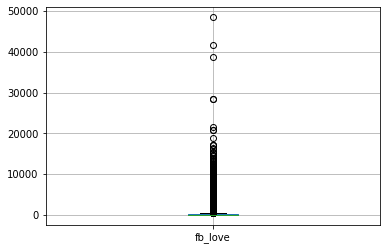

In [12]:
xdf[xdf['top_reaction']=='fb_love'].boxplot(column=['fb_love'])

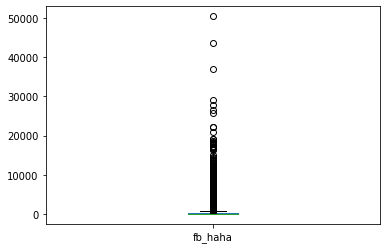

In [7]:
xdf[xdf['top_reaction']=='fb_haha'].boxplot(column=['fb_haha'])

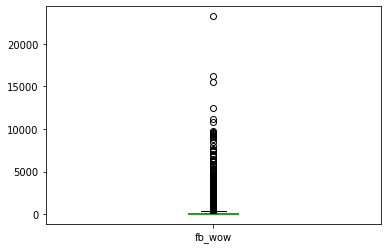

In [8]:
xdf[xdf['top_reaction']=='fb_wow'].boxplot(column=['fb_wow'])

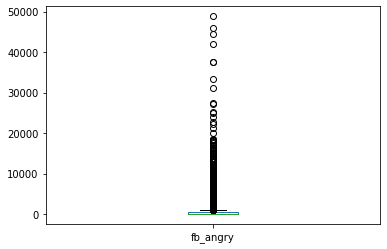

In [9]:
xdf[xdf['top_reaction']=='fb_angry'].boxplot(column=['fb_angry'])

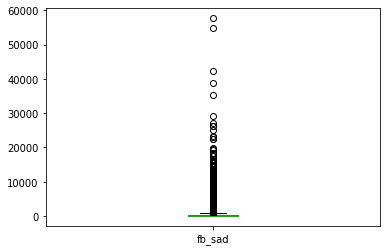

In [10]:
xdf[xdf['top_reaction']=='fb_sad'].boxplot(column=['fb_sad'])

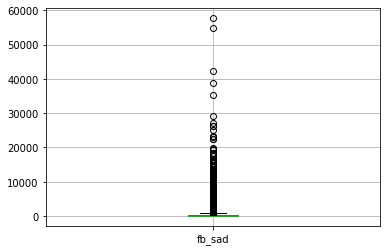

In [11]:
xdf[xdf['top_reaction']=='fb_sad'].boxplot(column=['fb_sad'])